In [85]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize pixel values
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [106]:

main_6 = train_dataset.__getitem__(13)[0].squeeze(0)
another_6 = train_dataset.__getitem__(18)[0].squeeze(0)
comp_8 = train_dataset.__getitem__(31)[0].squeeze(0)

left_shift = main_6[:, 3:]
blank_pad = torch.ones((28, 3)) * -0.4242 #imgs use -0.4242 as black value
shifted_6 = torch.concat([left_shift, blank_pad], dim=1)

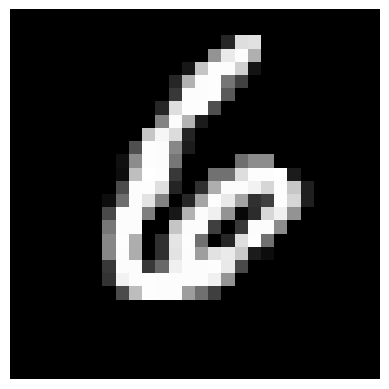

In [ ]:
plt.imshow(main_6, cmap='gray')
plt.axis('off')
plt.savefig('main_6.png', bbox_inches='tight', pad_inches=0)
plt.show()

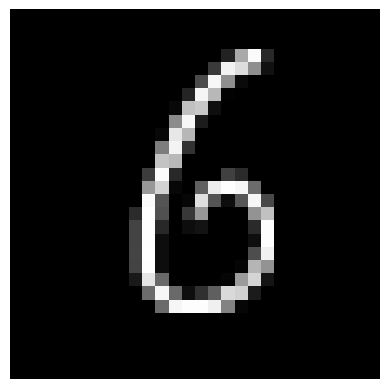

In [73]:
plt.imshow(another_6, cmap='gray')
plt.axis('off')
plt.savefig('another_6.png', bbox_inches='tight', pad_inches=0)
plt.show()

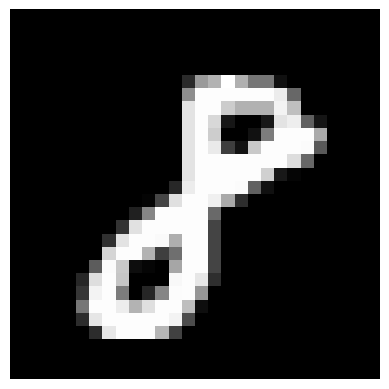

In [74]:
plt.imshow(comp_8, cmap='gray')
plt.axis('off')
plt.savefig('compare_8.png', bbox_inches='tight', pad_inches=0)
plt.show()

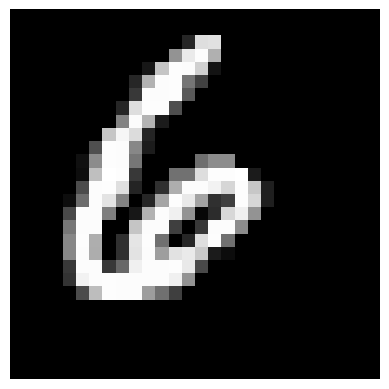

In [109]:
plt.imshow(shifted_6, cmap='gray')
plt.axis('off')
plt.savefig('shifted_6.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [107]:
def compare_imgs(img1, img2):
  mae = torch.abs(img1 - img2).mean().item()
  cos_sim = F.cosine_similarity(img1.flatten(), img2.flatten(), dim=0).item()
  return mae, cos_sim


print(f'main 6 vs another 6: {compare_imgs(main_6, another_6)[1]:.2f}')
print(f'main 6 vs an 8: {compare_imgs(main_6, comp_8)[1]:.2f}')
print(f'main 6 vs shifted 6: {compare_imgs(main_6, shifted_6)[1]:.2f}')

main 6 vs another 6: 0.38
main 6 vs an 8: 0.31
main 6 vs shifted 6: 0.22


In [108]:
compare_imgs(main_6, shifted_6)

(0.6201131343841553, 0.21897155046463013)